In [16]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt 

In [17]:
#Generacion de los datos
X =np.array(np.linspace(-2, 2, 20))
X = X[:,np.newaxis]
#Pendiente (m), Corte en Y(b), Valores de Y sin ruido(_Y)
m , b = 0.5, 1
_Y = b +m*X
#Genera el ruido en los valores de _Y
Y=[]
for i in range(len(X)):
   a = _Y[i] + ( (-1)**( (i%2)+2) )   *0.1*random.random()
   Y.append(a)
Y=np.array(Y)
#Generar los datos y el mallado de m y b
_M , _B = np.linspace(-5, 5, 400) , np.linspace(-5, 5, 400)
M, B = np.meshgrid(_M, _B) 
#Calcula la y_ajuste para los distintos valores de M y B
#Luego calcula la resta del del y_real y el y_ajuste
E=np.zeros((len(M),len(M)))
for i in range(len(M)):
    for l in range(len(M)):
       
        y_ajuste = M[i][l]*X+B[i][l]
        e = (Y - y_ajuste )**2
        E[i][l]=np.sum(e)
#FIN DE LO NECESARIO

#Se define el Error Cuadratico como una funcion
def Error(m,b):
    y_ajuste = m*X+b
    e = (Y - y_ajuste)**2
    return np.sum(e)

#Se inicializa numeros random para m y b
mrandom, brandom = np.random.rand(1)*10-5 , np.random.rand(1)*10-5

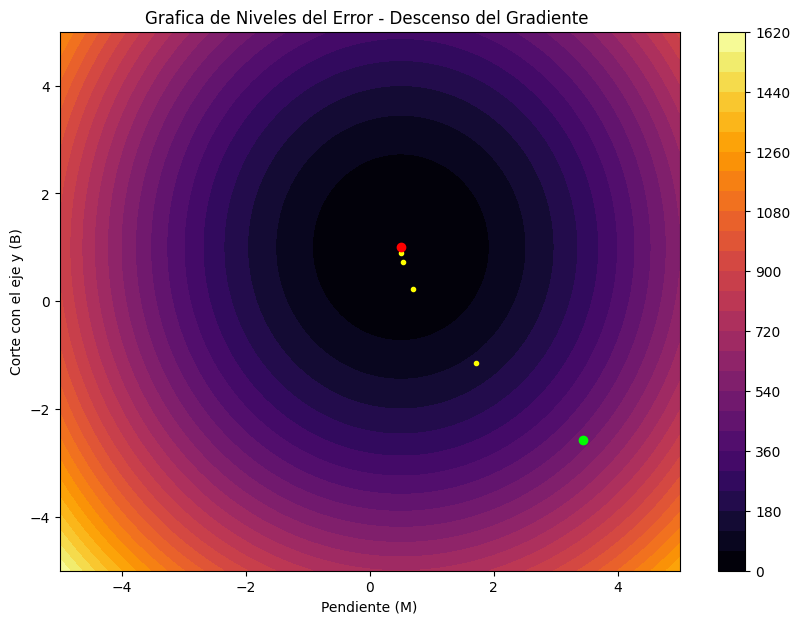



Valor real de m y b:    0.5            1
Valor predicho de m y b:  [0.50240974]   [1.00103281]


In [18]:
#Grafica de los niveles de superficies del error
fig = plt.figure(figsize=(10,7))
plt.title("Grafica de Niveles del Error - Descenso del Gradiente ")
plt.contourf(_M, _B, E, 30, cmap="inferno")
plt.xlabel('Pendiente (M)')
plt.ylabel('Corte con el eje y (B)')
plt.plot(mrandom,brandom, "o", color="lime")
plt.colorbar()
   
#COMENTARIO:El descenso no funcionan muy bien multiplicando por Grad(la suma de las derivas parciales)
#Gradiente del Error ; Descenso del Gradiente y Graficacion
lr=0.01 #learning rate
h=0.001  #Parametro de variacion para la derivada

for i in range(500):
#  Grad = (Error(mrandom+h,brandom)-Error(mrandom-h,brandom)) + (Error(mrandom,brandom+h)- Error(mrandom,brandom-h))
  mrandom = mrandom - lr*(Error(mrandom+h,brandom)-Error(mrandom,brandom))/h
  brandom = brandom - lr*(Error(mrandom,brandom+h)- Error(mrandom,brandom))/h
  if (i % 2 == 0):
   plt.plot(mrandom,brandom, ".", color="yellow") 

plt.plot(mrandom,brandom, "o", color="red")  
plt.show()  

#COMENTARIO: el valor final parece ser mas exacto si el numero random es cercano
#al valor real
print("\n")
print("Valor real de m y b:   ", m, "          ", b  )
print("Valor predicho de m y b: ", mrandom, " " , brandom)